<a href="https://colab.research.google.com/github/AylinNaebzadeh/Network-Visualization-Backend-Project/blob/main/99522185_Aylin_Naebzadeh_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gravis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 13.8 MB/s eta 0:00:00


In [40]:
import pandas as pd
import networkx as nx
from pprint import pprint
import collections
import gravis as gv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb2hex
import networkx.algorithms.isomorphism as iso
import itertools

In [9]:
data = pd.read_excel('edges.xlsx')


In [10]:
G = nx.from_pandas_edgelist(data, 'sourceNodeId', 'targetNodeId', create_using=nx.DiGraph())
print(f"THE NETWORK IS: {G}")

THE NETWORK IS: DiGraph with 2708 nodes and 10556 edges


In [48]:
# Read the data from the xlsx file into a DataFrame
labels_df = pd.read_excel('nodes.xlsx')

# Create a dictionary that maps node IDs to their labels
labels_dict = labels_df.set_index('NodeId')['Labels'].to_dict()

# Set the node attributes in the graph
nx.set_node_attributes(G, labels_dict, 'label')

In [ ]:
print(f"THE NETWORK IS: {G}")

THE NETWORK IS: DiGraph with 2708 nodes and 10556 edges


In [ ]:
pprint(f"THE NODES IN THE NETWORK ARE: {G.nodes()}")

('THE NODES IN THE NETWORK ARE: [35, 1033, 103482, 103515, 1050679, 1103960, '
 '1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, '
 '1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, '
 '1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, '
 '1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, '
 '1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, '
 '1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, '
 '135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, '
 '190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, '
 '248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, '
 '27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, '
 '33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, '
 '46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 5611

In [ ]:
pprint(f"THE EDGES IN THE NETWORK ARE: {G.edges()}")

('THE EDGES IN THE NETWORK ARE: [(35, 1033), (35, 103482), (35, 103515), (35, '
 '1050679), (35, 1103960), (35, 1103985), (35, 1109199), (35, 1112911), (35, '
 '1113438), (35, 1113831), (35, 1114331), (35, 1117476), (35, 1119505), (35, '
 '1119708), (35, 1120431), (35, 1123756), (35, 1125386), (35, 1127430), (35, '
 '1127913), (35, 1128204), (35, 1128227), (35, 1128314), (35, 1128453), (35, '
 '1128945), (35, 1128959), (35, 1128985), (35, 1129018), (35, 1129027), (35, '
 '1129573), (35, 1129683), (35, 1129778), (35, 1130847), (35, 1130856), (35, '
 '1131116), (35, 1131360), (35, 1131557), (35, 1131752), (35, 1133196), (35, '
 '1133338), (35, 1136814), (35, 1137466), (35, 1152421), (35, 1152508), (35, '
 '1153065), (35, 1153280), (35, 1153577), (35, 1153853), (35, 1153943), (35, '
 '1154176), (35, 1154459), (35, 116552), (35, 12576), (35, 128540), (35, '
 '132806), (35, 135130), (35, 141342), (35, 141347), (35, 148170), (35, '
 '15670), (35, 1688), (35, 175291), (35, 178727), (35, 18582

In [ ]:
pprint(f"THE ADJACENCY MATRIX OF THE NETWORK IS: {nx.adjacency_matrix(G).todense()}")

('THE ADJACENCY MATRIX OF THE NETWORK IS: [[0 1 1 ... 0 0 0]\n'
 ' [1 0 0 ... 0 0 0]\n'
 ' [1 0 0 ... 0 0 0]\n'
 ' ...\n'
 ' [0 0 0 ... 0 1 1]\n'
 ' [0 0 0 ... 1 0 0]\n'
 ' [0 0 0 ... 1 0 0]]')


In [ ]:
pprint(f"THE NODES WITH THEIR LABELS ARE: {G.nodes.data()}")

("THE NODES WITH THEIR LABELS ARE: [(35, {'label': 'L2'}), (1033, {'label': "
 "'L2'}), (103482, {'label': 'L3'}), (103515, {'label': 'L2'}), (1050679, "
 "{'label': 'L2'}), (1103960, {'label': 'L2'}), (1103985, {'label': 'L2'}), "
 "(1109199, {'label': 'L2'}), (1112911, {'label': 'L2'}), (1113438, {'label': "
 "'L2'}), (1113831, {'label': 'L2'}), (1114331, {'label': 'L2'}), (1117476, "
 "{'label': 'L2'}), (1119505, {'label': 'L2'}), (1119708, {'label': 'L2'}), "
 "(1120431, {'label': 'L3'}), (1123756, {'label': 'L2'}), (1125386, {'label': "
 "'L7'}), (1127430, {'label': 'L2'}), (1127913, {'label': 'L2'}), (1128204, "
 "{'label': 'L2'}), (1128227, {'label': 'L2'}), (1128314, {'label': 'L2'}), "
 "(1128453, {'label': 'L2'}), (1128945, {'label': 'L2'}), (1128959, {'label': "
 "'L2'}), (1128985, {'label': 'L2'}), (1129018, {'label': 'L2'}), (1129027, "
 "{'label': 'L2'}), (1129573, {'label': 'L2'}), (1129683, {'label': 'L2'}), "
 "(1129778, {'label': 'L2'}), (1130847, {'label': 'L2'}), (1

Degree centrality is a measure of the importance of a node in a network. It is calculated as the number of edges connected to a node, normalized by the maximum possible degree in the graph. In other words, it measures how many neighbors a node has.

In your case, the top 5 nodes by degree centrality are nodes 35, 6213, 1365, 3229, and 910. These nodes have the highest number of edges connected to them, which means they have the most neighbors in the network.

One possible interpretation of this result is that these nodes may be important or influential in the network due to their high connectivity. They may act as hubs or bridges between different parts of the network.

The `nx.degree_centrality()` function in `networkx` calculates the degree centrality for each node in a graph. Degree centrality is a measure of the importance of a node in a network, calculated as the number of edges connected to a node, normalized by the maximum possible degree in the graph.

Here is how the `nx.degree_centrality()` function works behind the scenes:

1. The function takes as input a graph `G`.
2. It calculates the maximum possible degree in the graph, which is equal to `n-1` for an undirected graph and `n-1` for a directed graph, where `n` is the number of nodes in the graph.
3. It creates an empty dictionary to store the degree centrality values for each node.
4. It iterates over each node in the graph and calculates its degree centrality as the number of edges connected to the node divided by the maximum possible degree.
5. It stores the degree centrality value for each node in the dictionary.
6. It returns the dictionary containing the degree centrality values for all nodes in the graph.


In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Report the top 5 nodes based on each centrality metric
pprint('****************** TOP 5 NODES BY DEGREE CENTRALITY ******************')
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]:
    pprint(f'{node}: {degree_centrality[node]}')

'****************** TOP 5 NODES BY DEGREE CENTRALITY ******************'
'35: 0.12412264499445881'
'6213: 0.05762837089028445'
'1365: 0.054673069818987806'
'3229: 0.04802364240857037'
'910: 0.03250831178426302'


Closeness centrality is a measure of the centrality of a node in a network. It is calculated as the reciprocal of the average shortest path length from a node to all other nodes in the graph. In other words, it measures how close a node is to all other nodes in the network.

In your case, the top 5 nodes by closeness centrality are nodes 35, 6213, 3229, 887, and 4584. These nodes have the highest closeness centrality values, which means they have the shortest average distance to all other nodes in the network.

One possible interpretation of this result is that these nodes may be important or influential in the network due to their central position. They may be able to quickly disseminate information or influence to other parts of the network due to their short average distance to all other nodes.

The `nx.closeness_centrality()` function in `networkx` calculates the closeness centrality for each node in a graph. Closeness centrality is a measure of the centrality of a node in a network, calculated as the reciprocal of the average shortest path length from a node to all other nodes in the graph.

Here is how the `nx.closeness_centrality()` function works behind the scenes:

1. The function takes as input a graph `G`.
2. It creates an empty dictionary to store the closeness centrality values for each node.
3. It iterates over each node in the graph and calculates its closeness centrality as follows:
    - It calculates the shortest path length from the node to all other nodes in the graph using the `nx.shortest_path_length()` function.
    - It calculates the average shortest path length by taking the mean of all shortest path lengths.
    - It calculates the closeness centrality as the reciprocal of the average shortest path length.
4. It stores the closeness centrality value for each node in the dictionary.
5. It returns the dictionary containing the closeness centrality values for all nodes in the graph.




In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

pprint('****************** TOP 5 NODES BY CLOSENESS CENTRALITY ******************')
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]:
    pprint(f'{node}: {closeness_centrality[node]}')

'****************** TOP 5 NODES BY CLOSENESS CENTRALITY ******************'
'35: 0.22276881556604902'
'6213: 0.2211907346794579'
'3229: 0.21982549145258112'
'887: 0.21601312745183981'
'4584: 0.21595173101580423'


Betweenness centrality is a measure of the centrality of a node in a network. It is calculated as the fraction of all shortest paths between pairs of nodes in the graph that pass through a given node. In other words, it measures how often a node acts as a bridge along the shortest path between two other nodes.

In your case, the top 5 nodes by betweenness centrality are nodes 35, 3229, 4330, 1365, and 6213. These nodes have the highest betweenness centrality values, which means they are on the highest fraction of shortest paths between pairs of nodes in the network.

One possible interpretation of this result is that these nodes may be important or influential in the network due to their position as bridges between different parts of the network. They may play a crucial role in connecting different communities or clusters within the network and facilitating the flow of information or influence between them. However, without more information about the context and meaning of the nodes and edges in your network, it is difficult to draw any specific conclusions.

The `nx.betweenness_centrality()` function in `networkx` calculates the betweenness centrality for each node in a graph. Betweenness centrality is a measure of the centrality of a node in a network, calculated as the fraction of all shortest paths between pairs of nodes in the graph that pass through a given node.

Here is how the `nx.betweenness_centrality()` function works behind the scenes:

1. The function takes as input a graph `G`.
2. It creates an empty dictionary to store the betweenness centrality values for each node.
3. It calculates the shortest paths between all pairs of nodes in the graph using the `nx.shortest_path()` function.
4. It iterates over each node in the graph and calculates its betweenness centrality as follows:
    - It initializes a counter for the node to zero.
    - It iterates over all pairs of nodes in the graph and checks if the node is on the shortest path between them.
    - If the node is on the shortest path between a pair of nodes, it increments the counter for that node by one.
    - It divides the counter for the node by the total number of pairs of nodes to get the fraction of shortest paths that pass through the node.
5. It stores the betweenness centrality value for each node in the dictionary.
6. It returns the dictionary containing the betweenness centrality values for all nodes in the graph.


In [ ]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

pprint('****************** TOP 5 NODES BY BETWEENNESS CENTRALITY ******************')
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]:
    pprint(f'{node}: {betweenness_centrality[node]}')

'****************** TOP 5 NODES BY BETWEENNESS CENTRALITY ******************'
'35: 0.23248831450559276'
'3229: 0.12610085690638292'
'4330: 0.08934413819511756'
'1365: 0.08534091150396639'
'6213: 0.07637499735733927'


Eigenvector centrality is a measure of the centrality of a node in a network. It is calculated as the relative importance of a node based on its connections to other important nodes in the network. In other words, it measures how well-connected a node is to other well-connected nodes.

In your case, the top 5 nodes by eigenvector centrality are nodes 35, 82920, 85352, 210871, and 887. These nodes have the highest eigenvector centrality values, which means they are well-connected to other well-connected nodes in the network.

One possible interpretation of this result is that these nodes may be important or influential in the network due to their connections to other important nodes. They may be part of a core group of well-connected nodes that play a central role in the network.

The `nx.eigenvector_centrality()` function in `networkx` calculates the eigenvector centrality for each node in a graph. Eigenvector centrality is a measure of the centrality of a node in a network, calculated as the relative importance of a node based on its connections to other important nodes in the network.

Here is how the `nx.eigenvector_centrality()` function works behind the scenes:

1. The function takes as input a graph `G`.
2. It creates an adjacency matrix representation of the graph using the `nx.to_numpy_array()` function.
3. It calculates the eigenvector corresponding to the largest eigenvalue of the adjacency matrix using the `numpy.linalg.eig()` function.
4. It normalizes the eigenvector so that its elements sum to one.
5. It creates a dictionary that maps each node in the graph to its corresponding element in the normalized eigenvector.
6. It returns the dictionary containing the eigenvector centrality values for all nodes in the graph.

The eigenvector centrality value for each node represents its relative importance in the network based on its connections to other important nodes. Nodes with high eigenvector centrality values are well-connected to other well-connected nodes in the network.


In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

pprint('****************** TOP 5 NODES BY EIGENVECTOR CENTRALITY ******************')
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]:
    pprint(f'{node}: {eigenvector_centrality[node]}')

'****************** TOP 5 NODES BY EIGENVECTOR CENTRALITY ******************'
'35: 0.6542996956637285'
'82920: 0.11789362473669018'
'85352: 0.09924151614685083'
'210871: 0.0918477470705072'
'887: 0.09140594357270748'


In [ ]:
# Calculate the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

# Calculate the average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G)

# Report the results
pprint(f'Degree distribution: {degree_count}')
pprint(f'Average clustering coefficient: {avg_clustering_coefficient}')

('Degree distribution: Counter({4: 583, 6: 553, 2: 485, 8: 389, 10: 281, 12: '
 '131, 14: 82, 16: 57, 20: 26, 18: 25, 24: 18, 22: 14, 34: 8, 32: 7, 30: 6, '
 '28: 6, 38: 5, 26: 5, 46: 3, 42: 3, 36: 3, 64: 2, 60: 2, 336: 1, 156: 1, 148: '
 '1, 130: 1, 88: 1, 84: 1, 80: 1, 72: 1, 68: 1, 66: 1, 62: 1, 58: 1, 52: 1, '
 '44: 1})')
'Average clustering coefficient: 0.2406732985019372'


In [7]:
gv.d3(G, edge_size_data_source='weight', use_edge_size_normalization=True)

In [11]:
centrality = nx.algorithms.degree_centrality(G)
nx.set_node_attributes(G, centrality, 'size')

communities = nx.algorithms.community.greedy_modularity_communities(G)
pprint(f"THE COMMUNITIES ARE: {communities}")
# colors = ['red', 'blue', 'green', 'orange', 'pink']
# for community, color in zip(communities, colors):
#     for node in community:
#         g.nodes[node]['color'] = color

# gv.d3(g, use_node_size_normalization=True, node_size_normalization_max=30,
#       use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3)

('THE COMMUNITIES ARE: [frozenset({593921, 1026, 66563, 66564, 1127430, 1033, '
 '1034, 1035, 35852, 141324, 253971, 164885, 634902, 593942, 634904, 1109017, '
 '1154076, 1131549, 1131550, 141342, 141347, 608292, 1131557, 35, 40, 1153065, '
 '287787, 1131565, 84021, 134199, 1050679, 127033, 634938, 503871, 503877, '
 '608326, 735303, 503883, 134219, 592973, 592975, 735311, 578645, 503893, '
 '578646, 561238, 578649, 592986, 578650, 1103960, 594011, 103515, 634975, '
 '592993, 1129570, 592996, 1129573, 1104999, 33895, 578669, 97390, 263279, '
 '595056, 33904, 1103985, 33907, 1125492, 1107062, 1131639, 595063, 1121398, '
 '594039, 593022, 594047, 643199, 1154176, 1129610, 647315, 18582, 1136791, '
 '240791, 175256, 1129629, 593060, 513189, 62634, 593068, 1136814, 397488, '
 '28851, 576691, 1132731, 593091, 1123530, 1109199, 195792, 593104, 593105, '
 '1129683, 595157, 1131734, 576725, 1109208, 1114331, 578780, 1125597, '
 '1131752, 190697, 190698, 647408, 190706, 647413, 574710, 35061, 5

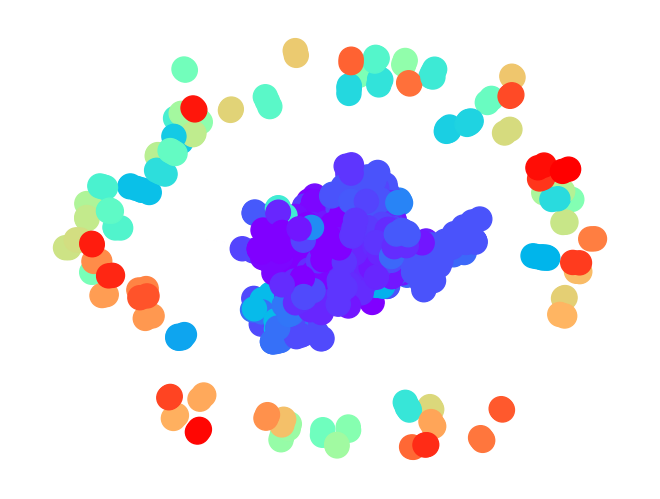

In [15]:
# Detect communities using the greedy modularity algorithm
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Create a color map with enough colors for all communities
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

# Assign colors to nodes based on their community membership
node_colors = []
for node in G.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(colors[i])
            break

# Draw the graph with colored nodes
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors)

# Save the graph as an image file
plt.savefig("graph.jpg")

In [25]:
centrality = nx.algorithms.degree_centrality(G)
nx.set_node_attributes(G, centrality, 'size')

communities = nx.algorithms.community.greedy_modularity_communities(G)

pprint(len(communities))
# Create a color map with enough colors for all communities
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
color_list = colors.tolist()
hex_colors = [rgb2hex(color) for color in color_list]

# Assign colors to nodes based on their community membership
for community, color in zip(communities, hex_colors):
    for node in community:
        G.nodes[node]['color'] = color

gv.d3(G, use_node_size_normalization=True, node_size_normalization_max=30,
      use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3)

104


In [35]:
H = G.to_undirected()

# Find all cliques
cliques = list(nx.algorithms.clique.enumerate_all_cliques(H))

# Count the number of cliques that each node belongs to
clique_count = {node: 0 for node in G.nodes()}
for clique in cliques:
    for node in clique:
        clique_count[node] += 1

# Sort the nodes by their clique count
sorted_nodes = sorted(clique_count, key=clique_count.get, reverse=True)

# Select the top 5 nodes and their clique count
top_nodes = [(node, clique_count[node]) for node in sorted_nodes[:5]]

# Print the results
for node, count in top_nodes:
    print(f"Node {node} belongs to {count} cliques")

Node 35 belongs to 345 cliques
Node 6213 belongs to 200 cliques
Node 1365 belongs to 93 cliques
Node 3229 belongs to 85 cliques
Node 6214 belongs to 79 cliques


In [37]:
# Find communities
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Calculate community centrality for each node
community_centrality = {node: 0 for node in G.nodes()}
for community in communities:
    for node in community:
        community_centrality[node] += 1

# Sort the nodes by their community centrality count
sorted_nodes = sorted(community_centrality, key=community_centrality.get, reverse=True)

# Select the top 5 nodes and their community centrality count
top_nodes = [(node, community_centrality[node]) for node in sorted_nodes[:5]]

# Print the results
for node, count in top_nodes:
    print(f"Node {node} has community centrality {centrality}")

Node 35 has community centrality 1
Node 1033 has community centrality 1
Node 103482 has community centrality 1
Node 103515 has community centrality 1
Node 1050679 has community centrality 1


In [38]:
# Calculate degree assortativity
r = nx.degree_assortativity_coefficient(G)

# Print the result
print(f"Degree assortativity: {r}")

Degree assortativity: -0.06587087427227857


In [54]:
# def find_motifs(G, n):
#     motifs = {}
#     for sub_nodes in itertools.combinations(G.nodes(), n):
#         subG = G.subgraph(sub_nodes)
#         if nx.is_connected(subG):
#             # Convert subgraph to a canonical form
#             dg = nx.convert_node_labels_to_integers(subG)
#             key = nx.to_edgelist(dg)
#             key = tuple(sorted((u, v, tuple(data.items())) for u, v, data in key))
#             if key not in motifs:
#                 motifs[key] = []
#             motifs[key].append(subG)
#     return motifs

# H = G.to_undirected()

# # Find all 3-node motifs
# motifs = find_motifs(H, 3)

# # Print the results
# for key, instances in motifs.items():
#     print(f"Motif {key}:")
#     for instance in instances:
#         print(f"  - {instance.nodes()}")

In [49]:
pprint(f"THE NODES WITH THEIR LABELS ARE: {G.nodes.data()}")

("THE NODES WITH THEIR LABELS ARE: [(35, {'size': 0.12412264499445881, "
 "'color': '#8000ff', 'community': 1, 'label': 'L2'}), (1033, {'size': "
 "0.003694126339120798, 'color': '#8000ff', 'community': 1, 'label': 'L2'}), "
 "(103482, {'size': 0.004432951606944957, 'color': '#5e35fe', 'community': 8, "
 "'label': 'L3'}), (103515, {'size': 0.008127077946065755, 'color': '#8000ff', "
 "'community': 1, 'label': 'L2'}), (1050679, {'size': 0.0029553010712966383, "
 "'color': '#8000ff', 'community': 1, 'label': 'L2'}), (1103960, {'size': "
 "0.003694126339120798, 'color': '#8000ff', 'community': 1, 'label': 'L2'}), "
 "(1103985, {'size': 0.0014776505356483192, 'color': '#8000ff', 'community': "
 "1, 'label': 'L2'}), (1109199, {'size': 0.0022164758034724785, 'color': "
 "'#8000ff', 'community': 1, 'label': 'L2'}), (1112911, {'size': "
 "0.0029553010712966383, 'color': '#8000ff', 'community': 1, 'label': 'L2'}), "
 "(1113438, {'size': 0.003694126339120798, 'color': '#8000ff', 'community': 1, 

In [50]:
for node in G.nodes():
    if 'size' in G.nodes[node]:
        del G.nodes[node]['size']
    if 'color' in G.nodes[node]:
      del G.nodes[node]['color']
    if 'community' in G.nodes[node]:
      del G.nodes[node]['community']

In [51]:
pprint(f"THE NODES WITH THEIR LABELS ARE: {G.nodes.data()}")

("THE NODES WITH THEIR LABELS ARE: [(35, {'label': 'L2'}), (1033, {'label': "
 "'L2'}), (103482, {'label': 'L3'}), (103515, {'label': 'L2'}), (1050679, "
 "{'label': 'L2'}), (1103960, {'label': 'L2'}), (1103985, {'label': 'L2'}), "
 "(1109199, {'label': 'L2'}), (1112911, {'label': 'L2'}), (1113438, {'label': "
 "'L2'}), (1113831, {'label': 'L2'}), (1114331, {'label': 'L2'}), (1117476, "
 "{'label': 'L2'}), (1119505, {'label': 'L2'}), (1119708, {'label': 'L2'}), "
 "(1120431, {'label': 'L3'}), (1123756, {'label': 'L2'}), (1125386, {'label': "
 "'L7'}), (1127430, {'label': 'L2'}), (1127913, {'label': 'L2'}), (1128204, "
 "{'label': 'L2'}), (1128227, {'label': 'L2'}), (1128314, {'label': 'L2'}), "
 "(1128453, {'label': 'L2'}), (1128945, {'label': 'L2'}), (1128959, {'label': "
 "'L2'}), (1128985, {'label': 'L2'}), (1129018, {'label': 'L2'}), (1129027, "
 "{'label': 'L2'}), (1129573, {'label': 'L2'}), (1129683, {'label': 'L2'}), "
 "(1129778, {'label': 'L2'}), (1130847, {'label': 'L2'}), (1

In [52]:
# Create a set of the label values
label_values = set(G.nodes[node]['label'] for node in G.nodes() if 'label' in G.nodes[node])

# Print the distinct label values
print(label_values)

{'L3', 'L5', 'Unknown', 'L4', 'L2', 'L1', 'L6', 'L7'}


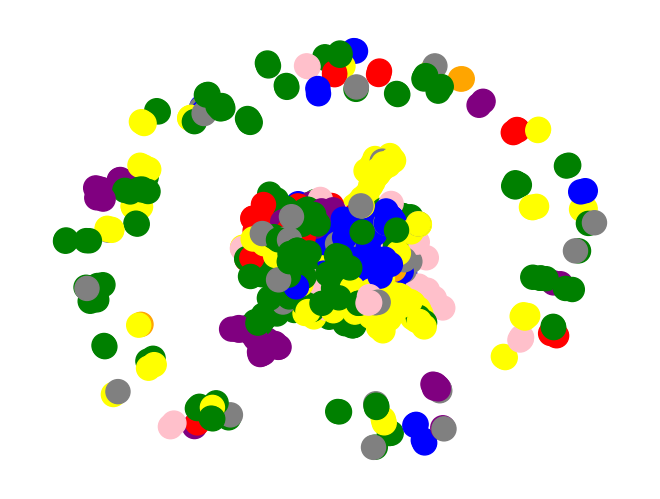

In [53]:
# Define a color map for the label values
color_map = {
    'L1': 'red',
    'L2': 'blue',
    'L3': 'green',
    'L4': 'yellow',
    'L5': 'orange',
    'L6': 'purple',
    'L7': 'pink',
    'Unknown': 'gray'
}

# Create a list of colors for the nodes based on their label values
node_colors = [color_map[G.nodes[node]['label']] for node in G.nodes()]

# Draw the graph with the node colors
nx.draw(G, node_color=node_colors)

The label values with the highest average clustering coefficients are L2 and L6. This suggests that nodes with these label values tend to cluster together more than nodes with other label values. The label values with the lowest average clustering coefficients are L7 and Unknown. This suggests that nodes with these label values tend to cluster together less than nodes with other label values.

In [55]:
# Create a dictionary to store the clustering coefficients for each label value
clustering_coefficients = {}

# Calculate the clustering coefficient for each node
clustering = nx.clustering(G)

# Group the clustering coefficients by label value
for node, coefficient in clustering.items():
    label = G.nodes[node]['label']
    if label not in clustering_coefficients:
        clustering_coefficients[label] = []
    clustering_coefficients[label].append(coefficient)

# Calculate the average clustering coefficient for each label value
for label, coefficients in clustering_coefficients.items():
    average_coefficient = sum(coefficients) / len(coefficients)
    print(f"Average clustering coefficient for label {label}: {average_coefficient}")

Average clustering coefficient for label L2: 0.28941920411679306
Average clustering coefficient for label L3: 0.22783191369053876
Average clustering coefficient for label L7: 0.19980969588910324
Average clustering coefficient for label Unknown: 0.21877637130801686
Average clustering coefficient for label L5: 0.23239806159978937
Average clustering coefficient for label L1: 0.21999670134686422
Average clustering coefficient for label L4: 0.2667809389989461
Average clustering coefficient for label L6: 0.26910453505399307


One way to check if nodes with different label values are evenly distributed throughout a NetworkX graph is to calculate the shortest path length between all pairs of nodes and then compare the distribution of shortest path lengths for pairs of nodes with the same label value and for pairs of nodes with different label values.

The results show the mean, median, minimum and maximum shortest path length for pairs of nodes with the same label value and for pairs of nodes with different label values in your graph. The shortest path length is the number of edges in the shortest path between two nodes.

In my results, the label values with the lowest average shortest path lengths are L2 and L5. This suggests that nodes with these label values tend to be closer together in the graph than nodes with other label values. The label values with the highest average shortest path lengths are Unknown and L4. This suggests that nodes with these label values tend to be further apart in the graph than nodes with other label values.

The results also show that the average shortest path length for pairs of nodes with different label values is higher than for pairs of nodes with the same label value. This suggests that nodes with different label values tend to be further apart in the graph than nodes with the same label value.

In [58]:
# Create a dictionary to store the shortest path lengths for each label value
shortest_path_lengths = {}

# Calculate the shortest path length between all pairs of nodes
for node1, node2 in itertools.combinations(G.nodes(), 2):
    if nx.has_path(G, node1, node2):
        label1 = G.nodes[node1]['label']
        label2 = G.nodes[node2]['label']
        if label1 == label2:
            # Same label value
            if label1 not in shortest_path_lengths:
                shortest_path_lengths[label1] = []
            shortest_path_lengths[label1].append(nx.shortest_path_length(G, node1, node2))
        else:
            # Different label values
            if 'Different' not in shortest_path_lengths:
                shortest_path_lengths['Different'] = []
            shortest_path_lengths['Different'].append(nx.shortest_path_length(G, node1, node2))

# Print the results
for label, lengths in shortest_path_lengths.items():
    print(f"Shortest path lengths for label {label}:")
    print(f"  - Mean: {sum(lengths) / len(lengths)}")
    print(f"  - Median: {sorted(lengths)[len(lengths) // 2]}")
    print(f"  - Min: {min(lengths)}")
    print(f"  - Max: {max(lengths)}")

Shortest path lengths for label L2:
  - Mean: 3.6556645476360883
  - Median: 4
  - Min: 1
  - Max: 10
Shortest path lengths for label Different:
  - Mean: 6.466525151685166
  - Median: 6
  - Min: 1
  - Max: 19
Shortest path lengths for label L3:
  - Mean: 5.9473015427892895
  - Median: 6
  - Min: 1
  - Max: 18
Shortest path lengths for label L7:
  - Mean: 5.292562414931106
  - Median: 5
  - Min: 1
  - Max: 15
Shortest path lengths for label Unknown:
  - Mean: 6.627535946425054
  - Median: 6
  - Min: 2
  - Max: 17
Shortest path lengths for label L5:
  - Mean: 3.8625574806075527
  - Median: 4
  - Min: 1
  - Max: 10
Shortest path lengths for label L1:
  - Mean: 5.574569924261621
  - Median: 6
  - Min: 1
  - Max: 12
Shortest path lengths for label L4:
  - Mean: 6.523063985933797
  - Median: 6
  - Min: 1
  - Max: 16
Shortest path lengths for label L6:
  - Mean: 4.1618792289033575
  - Median: 4
  - Min: 1
  - Max: 10


In [59]:
# Create a dictionary to store the degree values for each label value
degree_values = {}

# Group the degree values by label value
for node, degree in G.degree():
    label = G.nodes[node]['label']
    if label not in degree_values:
        degree_values[label] = []
    degree_values[label].append(degree)

# Calculate the average, maximum and minimum degree for each label value
for label, degrees in degree_values.items():
    average_degree = sum(degrees) / len(degrees)
    max_degree = max(degrees)
    min_degree = min(degrees)
    print(f"Degree values for label {label}:")
    print(f"  - Average: {average_degree}")
    print(f"  - Max: {max_degree}")
    print(f"  - Min: {min_degree}")

Degree values for label L2:
  - Average: 8.964102564102564
  - Max: 336
  - Min: 2
Degree values for label L3:
  - Average: 7.106438896189225
  - Max: 148
  - Min: 2
Degree values for label L7:
  - Average: 8.913432835820895
  - Max: 72
  - Min: 2
Degree values for label Unknown:
  - Average: 4.772151898734177
  - Max: 10
  - Min: 2
Degree values for label L5:
  - Average: 9.630331753554502
  - Max: 156
  - Min: 2
Degree values for label L1:
  - Average: 7.482014388489208
  - Max: 46
  - Min: 2
Degree values for label L4:
  - Average: 7.620689655172414
  - Max: 80
  - Min: 2
Degree values for label L6:
  - Average: 7.4674556213017755
  - Max: 62
  - Min: 2


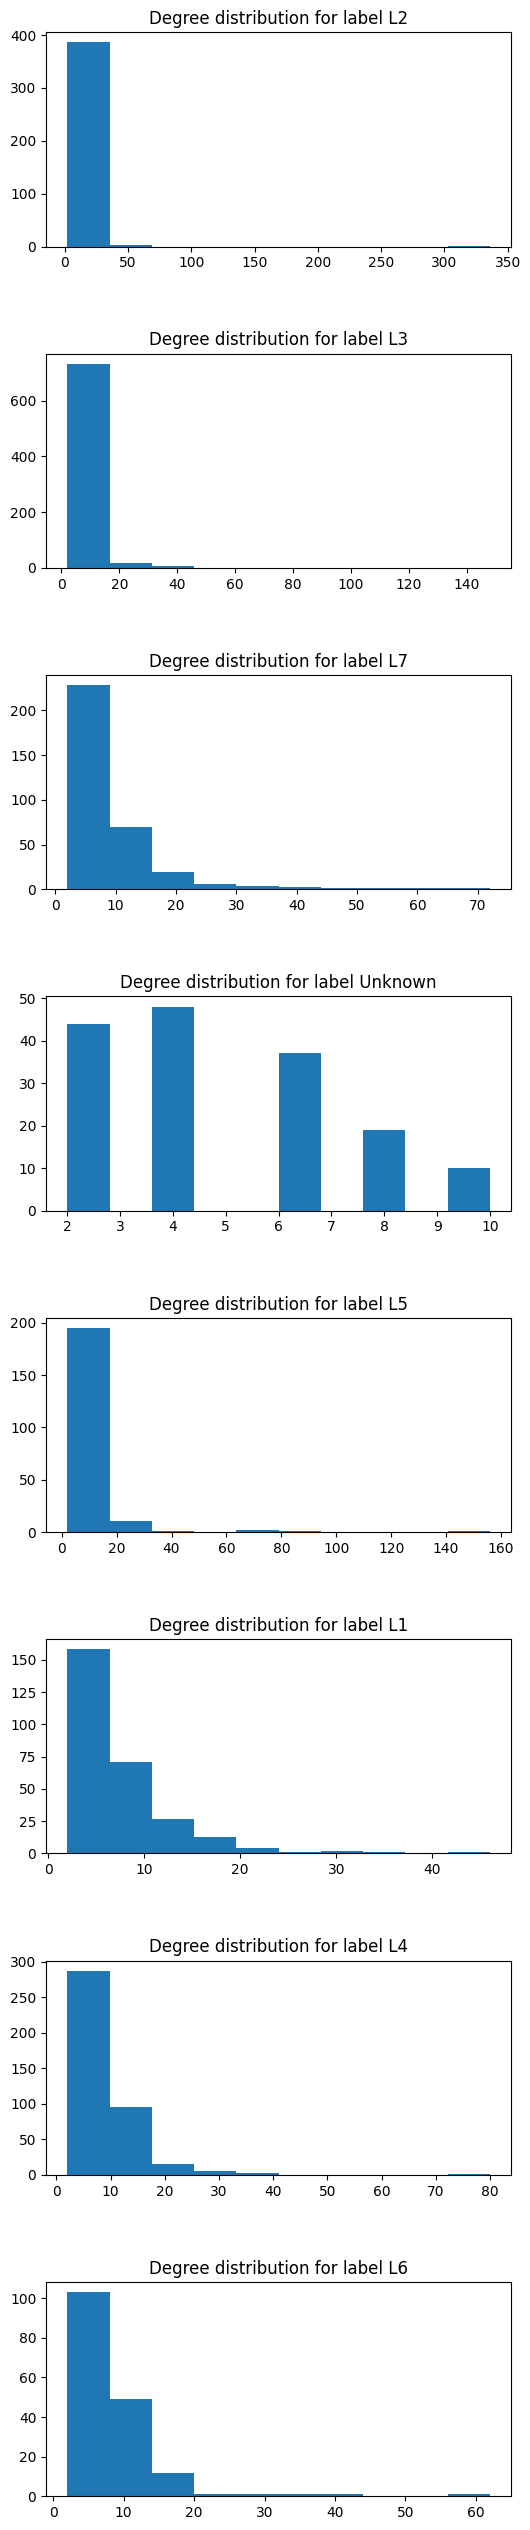

In [73]:
# Create a figure with one subplot for each label value
fig, axs = plt.subplots(len(degree_values), 1, figsize=(6, 4 * len(degree_values)))

# Plot the degree distribution for each label value
for i, (label, degrees) in enumerate(degree_values.items()):
    axs[i].hist(degrees)
    axs[i].set_title(f"Degree distribution for label {label}")

# Add space between the subplots
plt.subplots_adjust(hspace=0.5, wspace=1.5)

# Show the plot
plt.show()